# 로지스틱 회귀
## 데이터 준비

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()

In [4]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [5]:
fish_target = fish["Species"].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


다중 분류: 타깃 데이터에 2개 이상의 클래스가 포함된 문제

In [9]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
print(kn.predict(test_scaled[:5])) # 가장 속했을 확률이 높은 대상 출력

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [11]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) # 각 클래스에 속할 확률
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [12]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀

로지스틱 회귀: 선형 회귀와 동일하게 선형 방정식을 학습하는 분류 모델

시그모이드(sigmoid function): 크기가 아주 큰 양수일 때 1이 되고, 아주 큰 음수일 때, 0이 되게 하는 함수 = 로지스틱 함수(logistic function)

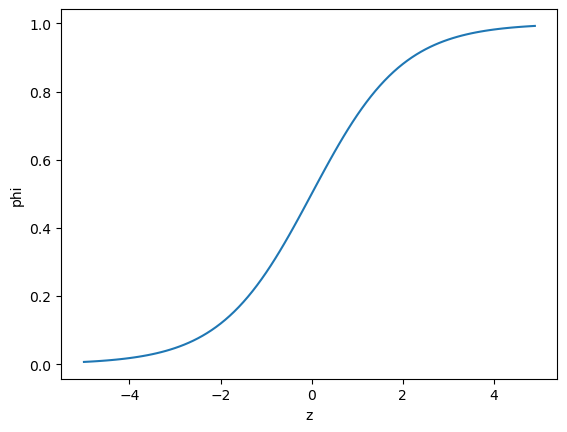

In [13]:
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

### 이진 분류
불리언 인덱싱(Boolean Indexing): 넘파이 배열이 True, False 값을 전달하여 행을 선택하는 것

In [14]:
char_arr = np.array(["A", "B", "C", "D", "E"])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [15]:
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [17]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [18]:
print(lr.predict_proba(train_bream_smelt[:5])) # 왼쪽이 음성 클래스, 오른쪽이 양성 클래스의 확률

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [19]:
print(lr.classes_)

['Bream' 'Smelt']


In [20]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


z = -0.404 x (Weight) - 0.576 x (Length) - 0.663 x (Diagonal) - 1.013 x (Height) - 0.732 x (Width) - 2.161

In [21]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


사이파이(scipy) 라이브러리 -> 시그모이드 함수: expit()

In [22]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 다중 분류
L2규제: 릿지 회귀와 같은 계수의 제곱의 규제

규제 제어 매개변수: C(작을수록 규제가커짐, default는 1)

In [24]:
lr = LogisticRegression(C=20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [25]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [26]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [27]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [28]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


소프트맥스(softmax)함수: 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 만든 함수 -> 정규화된 지수 함수

e_sum = e^z1 + e^z2 + ... + e^z7

s1 = e^z1 / e_sum ....

s1 + s2 + ... + s7 = 1

In [30]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [31]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 확률적 경사 하강법
## 점진적 학습
### 확률적 경사 하강법

train data set이 한 번에 주어지는 것이 아니라 조금씩 전달되는 경우

1. 기존의 데이터에 새로운 데이터를 추가해서 매번 훈련하기: 시간이 지날수록 데이터가 늘어나고, 서버도 늘려야 함.

2. 이전 데이터를 버림으로써 train data set의 크기를 일정하게 유지: 중요 데이터가 사라질 수 있음.

-> 이전의 내용을 버리지 않고 조금씩만 더 훈련하기: 점진적 학습!!!!

<font color=red>확률적 경사 하강법(Stochastic Gradient Descent): 대표적인 점진적 학습 알고리즘</font>

-> 경사 하강법: 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 방법

확률적: 무작위하게, train set에서 랜덤하게 하나의 샘플을 고르는 방법
   
-> 조금씩 내려와서 만족하는 위치에 도달하는 방법을 찾기

<font color = red>에포크(epoch): 확률적 경사 하강법에서 train set을 한 번 모두 사용하는 과정 -> 이 과정을 수십, 수백번 이상 수행</font>

<font color = blue>미니배치 경사 하강법(minibatch gradient descent): 무작위로 몇 개의 샘플을 선택하여 수행하는 경사 하강법

<font color = blue>배치 경사 하강법(batch gradient descent): 한번의 전체 샘플을 선택하여 수행하는 경사 하강법 -> 자원 소모 많음

### 손실 함수

<font color = red>손실 함수(loss function): 어떤 문제에서 머신 러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준
    
    = 비용함수(cost function)
    -> 작을수록 좋음

### 로지스틱 손실 함수

로지스틱 손실 함수: 타깃이 양성 클래스이면, 예측 x 타깃, 음성이면 1 - (예측 x 1)해서 낮을수록 손실이 작음

-> 로그 함수를 적용해서 좀 더 편하게 확인할 수 있음

= 이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)

크로스엔트로피 손실 함수(cross-entropy loss function): 다중 분류에서 사용하는 손실 함수

평균 제곱 오차(mean squared error): 회귀에서 사용하는 손실 함수, (타깃 - 예측)^2의 평균(평균 절댓값 오차도 사용)

## SGDClassifier

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [2]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법 제공 클래스
sc = SGDClassifier(loss = "log_loss", max_iter=10, random_state=42) 
# 클래스별로 이진 분류 모델을 만드는 OvR(One Versus Rest)방식, max_iter은 에포크의 수
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


D:\anaconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [13]:
sc.partial_fit(train_scaled, train_target) # 추가 훈련하는 방법
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소 적합

에포크의 횟수가 적으면 train set 학습의 횟수가 적고, 반대이면 많음.

-> 에포크가 적으면 과소적합, 에포크가 많으면 과대적합될 수 있음.

조기 종료(early stopping): 과대적합이 시작하기 전에 훈련을 멈추는 것

In [14]:
import numpy as np
sc = SGDClassifier(loss = "log_loss", random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [15]:
for _ in range(300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

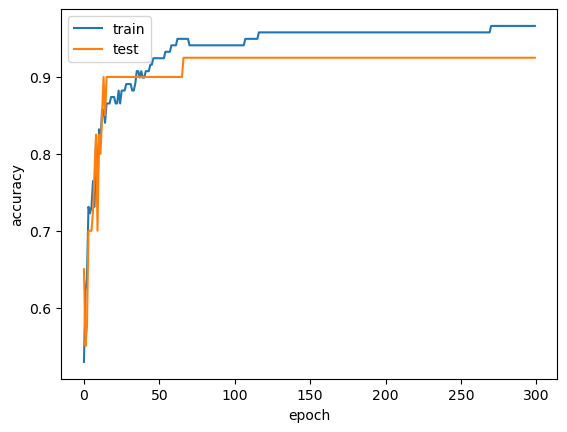

In [19]:
import matplotlib.pyplot as plt
plt.plot(train_score, label = "train")
plt.plot(test_score, label = "test")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

100에포크 이후에 train set과 test set의 차이 벌어짐

In [20]:
sc = SGDClassifier(loss = "log_loss", max_iter=100, tol=None, random_state=42) # tol=None은 자동종료 X
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


힌지 손실(hinge loss): loss 매개변수의 기본값, 서포트 벡터 머신(support vector machine)의 손실 함수

In [21]:
sc = SGDClassifier(loss = "hinge", max_iter=100, tol = None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
